In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# 1. Load the dataset
from google.colab import files      #google: top-level package in Colab, files: module for file upload/download.
uploaded = files.upload()           #upload: method that opens a file picker, (): calls the method, returns a dict of {filename: content}.
csv_filename = next(iter(uploaded)) #next: built-in function giving the next item from an iterator, iter: built-in that returns an iterator over a collection, uploaded: the dict we got from files.upload().
df = pd.read_csv(csv_filename)

# 2. Quick data overview
print("Data shape:", df.shape)
print("\nStatistical summary (df.describe()):\n", df.describe())

# 3. Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())

# 4. head
print("head", df.head())

# 5. Tail
print("Tail", df.tail())



#7. Info
print("info",df.info())


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
print(f"Original shape: {df.shape}")
if duplicates > 0:
    df = df.drop_duplicates()

print(f"After removing duplicates: {df.shape}")



Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv
Data shape: (1190, 12)

Statistical summary (df.describe()):
                age          sex  chest pain type  resting bps  cholesterol  \
count  1190.000000  1190.000000      1190.000000  1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773   132.153782   210.363866   
std       9.358203     0.424884         0.935480    18.368823   101.420489   
min      28.000000     0.000000         1.000000     0.000000     0.000000   
25%      47.000000     1.000000         3.000000   120.000000   188.000000   
50%      54.000000     1.000000         4.000000   130.000000   229.000000   
75%      60.000000     1.000000         4.000000   140.000000   269.750000   
max      77.000000     1.000000         4.000000   200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv
✅ Dataset loaded!
Shape: (1190, 12)
Number of duplicates: 272
Original shape: (1190, 12)
After removing duplicates: (918, 12)

🔍 Grid Search for Logistic Regression...
✅ Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
📈 Best CV Accuracy: 0.8392

🔍 Grid Search for SVM...
✅ Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
📈 Best CV Accuracy: 0.8487

🔍 Grid Search for Decision Tree...
✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 5}
📈 Best CV Accuracy: 0.8065

🔍 Grid Search for Random Forest...
✅ Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
📈 Best CV Accuracy: 0.8569

🔍 Grid Search for XGBoost...
✅ Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
📈 Best CV Accuracy: 0.8610

🧠 Model Evaluation Results

📊 Logistic Regression Results:


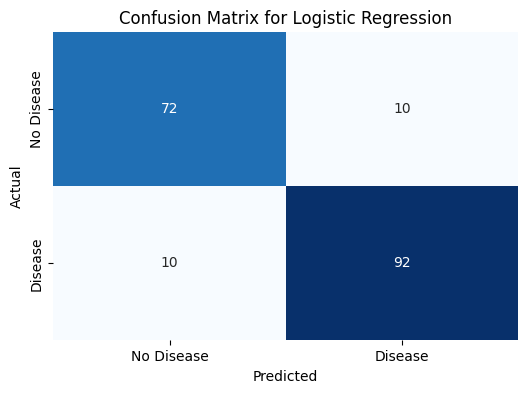

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.88      0.88        82
     Disease       0.90      0.90      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

------------------------------------------------------------

📊 SVM Results:
Train Accuracy: 0.9005
Test Accuracy: 0.8804


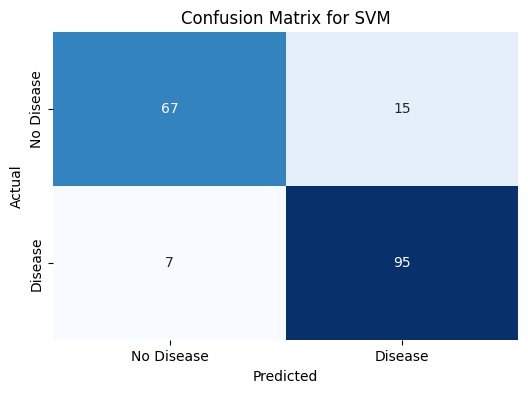

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.91      0.82      0.86        82
     Disease       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

------------------------------------------------------------

📊 Decision Tree Results:
Train Accuracy: 0.9087
Test Accuracy: 0.8261


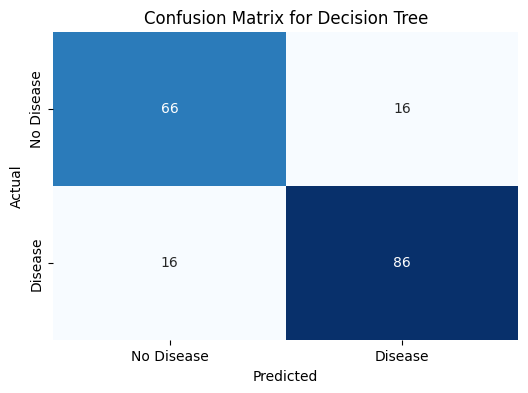

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.80      0.80        82
     Disease       0.84      0.84      0.84       102

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184

------------------------------------------------------------

📊 Random Forest Results:
Train Accuracy: 0.9183
Test Accuracy: 0.8859


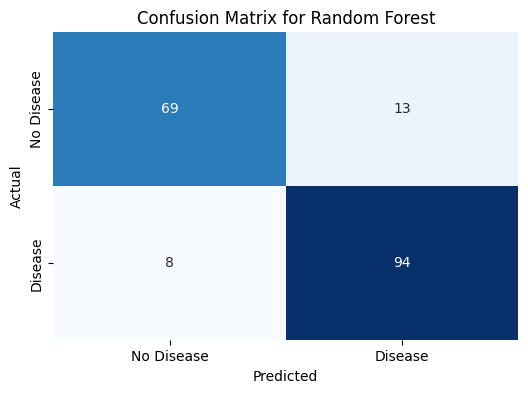

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.90      0.84      0.87        82
     Disease       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

------------------------------------------------------------

📊 XGBoost Results:
Train Accuracy: 0.9673
Test Accuracy: 0.8859


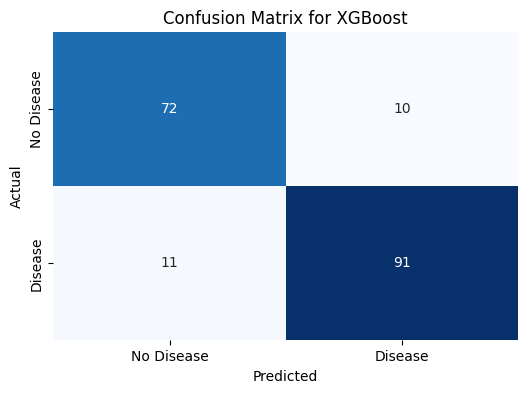

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.87      0.88      0.87        82
     Disease       0.90      0.89      0.90       102

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

------------------------------------------------------------


In [ ]:
# 📦 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

# 🚀 Upload dataset
from google.colab import files
uploaded = files.upload()
csv_filename = next(iter(uploaded))
df = pd.read_csv(csv_filename)
print("✅ Dataset loaded!")
print("Shape:", df.shape)

# Handle missing values
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df.apply(pd.to_numeric)


# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
print(f"Original shape: {df.shape}")
if duplicates > 0:
    df = df.drop_duplicates()

print(f"After removing duplicates: {df.shape}")

# Feature Engineering
df['age_bins'] = pd.cut(df['age'], bins=[0, 40, 55, 70, 100], labels=[0, 1, 2, 3])
df['cholesterol_bins'] = pd.cut(df['cholesterol'], bins=[0, 200, 240, 600], labels=[0, 1, 2])
df['max heart rate_oldpeak'] = df['max heart rate'] * df['oldpeak']
df['chest pain type_resting bps'] = df['chest pain type'] * df['resting bps']

# Prepare X and y
X = df.drop("target", axis=1)
y = (df["target"] > 0).astype(int)

X = pd.get_dummies(X, columns=['age_bins', 'cholesterol_bins'])

# Polynomial interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = pd.DataFrame(X_poly)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# ------------------------- Hyperparameter Grids -------------------------
param_grids = {
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "SVM": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'probability': [True]
    },
    "Decision Tree": {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1],
        'colsample_bytree': [0.8, 1]
    }
}

# Models to train
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Grid Search + Training
best_models = {}
def grid_search_model(model, param_grid, name):
    print(f"\n🔍 Grid Search for {name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f"✅ Best Parameters: {grid_search.best_params_}")
    print(f"📈 Best CV Accuracy: {grid_search.best_score_:.4f}")
    return grid_search.best_estimator_

for name in base_models:
    best_model = grid_search_model(base_models[name], param_grids[name], name)
    best_models[name] = best_model

# ------------------------- Evaluation -------------------------
def evaluate_model(model, model_name):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n📊 {model_name} Results:")
    print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

    # Compute and plot confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print("Classification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['No Disease', 'Disease']))
    print("-" * 60)

print("\n🧠 Model Evaluation Results")
for name, model in best_models.items():
    evaluate_model(model, name)

In [ ]:
import pickle

# Save all best models to .pkl files
for name, model in best_models.items():
    filename = name.lower().replace(" ", "_") + "_Model.pkl"
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

print("✅ All models saved as .pkl files!")
from google.colab import files
files.download('xgboost_Model.pkl')
files.download('logistic_regression_Model.pkl')
files.download('svm_Model.pkl')
files.download('decision_tree_Model.pkl')
files.download('random_forest_Model.pkl')

✅ All models saved as .pkl files!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save models to disk
joblib.dump(best_models["Logistic Regression"], "logistic_regression_Model.pkl")
joblib.dump(best_models["SVM"], "svm_Model.pkl")
joblib.dump(best_models["Decision Tree"], "decision_tree_Model.pkl")
joblib.dump(best_models["Random Forest"], "random_forest_Model.pkl")
joblib.dump(best_models["XGBoost"], "xgboost_Model.pkl")

print("✅ All models saved successfully!")

✅ All models saved successfully!


In [ ]:
import joblib

# Save preprocessor objects
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly.pkl')

print("✅ Preprocessor objects saved successfully!")
files.download('scaler.pkl')
files.download('poly.pkl')

✅ Preprocessor objects saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
expected_columns = X.columns
joblib.dump(expected_columns, 'expected_columns.pkl')
files.download('expected_columns.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>